# Problem Statement:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

## Approach
- Step 1 : Data Loading, Data Inspection and Processing, Data Visualisation
- Step 2 : Preparing the Data for Modelling
-              - Create Dummies if required
-              - Splitting of Data
-              - Scaling
- Step 3 : Training the Model
- Step 4 : Residual Analysis
- Step 5 : Prediction and Evaluation of the test data set

# Step 1a :Data Loading

In [1392]:
# import necassry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1393]:
bbike = pd.read_csv('day.csv')
bbike.head(13)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [1394]:
bbike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


# Step 1b: Data Inspection

In [1396]:
bbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1397]:
bbike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1398]:
bbike['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [1399]:
bbike['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [1400]:
bbike['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [1401]:
bbike['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [1402]:
bbike['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [1403]:
bbike['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [1404]:
bbike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

# Step 1c : Data processing

In [1407]:
#change the dteday column into date format
bbike['dteday'] = pd.to_datetime(bbike['dteday'], format='%d-%m-%Y')

In [1408]:
bbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

# Step 1d : Data cleaning

In [1410]:
#Drop columns 'causal' and 'registered'
del bbike['casual']

In [1411]:
# drop column 'registered'
del bbike['registered']

In [1412]:
bbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1413]:
#Find NULL Value columns
bbike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

We have NO missing values

### Re-mapping categorical columns for better visualisation
        We will map 'season','month','weekday','weathersit'

In [1416]:
# re-mapping seasons
s_list = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bbike['seasons'] = bbike['season'].map(s_list)
bbike.head()
bbike.info()
bbike['seasons'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  cnt         730 non-null    int64         
 14  seasons     730 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 85.7+ 

seasons
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [1417]:
# re-mapping month
bbike[['mnth','dteday']]
bbike['month_name'] = bbike['dteday'].dt.month_name()
bbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,seasons,month_name
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,spring,January
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,spring,January
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,January
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,spring,January
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,spring,January


In [1418]:
# re-mapping weekday
d_list = {6:'Monday', 0:'Tuesday', 1:'Wednesday', 2:'Thursday', 3:'Friday',4:'Saturday', 5:'Sunday'}
bbike['days_of_week'] = bbike['weekday'].map(d_list)

In [1419]:
# re-mapping workingday
wd_list = {0:'No', 1:'Yes'}
bbike['workingday'] = bbike['workingday'].map(wd_list)

In [1420]:
# re-mapping holiday
h_list = {1:'Yes', 0:'No'}
bbike['holiday'] = bbike['holiday'].map(h_list)

In [1421]:
bbike.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,seasons,month_name,days_of_week
0,1,2018-01-01,1,0,1,No,6,No,2,14.110847,18.18125,80.5833,10.749882,985,spring,January,Monday
1,2,2018-01-02,1,0,1,No,0,No,2,14.902598,17.68695,69.6087,16.652113,801,spring,January,Tuesday
2,3,2018-01-03,1,0,1,No,1,Yes,1,8.050924,9.47025,43.7273,16.636703,1349,spring,January,Wednesday
3,4,2018-01-04,1,0,1,No,2,Yes,1,8.200000,10.60610,59.0435,10.739832,1562,spring,January,Thursday
4,5,2018-01-05,1,0,1,No,3,Yes,1,9.305237,11.46350,43.6957,12.522300,1600,spring,January,Friday
5,6,2018-01-06,1,0,1,No,4,Yes,1,8.378268,11.66045,51.8261,6.000868,1606,spring,January,Saturday
6,7,2018-01-07,1,0,1,No,5,Yes,2,8.057402,10.44195,49.8696,11.304642,1510,spring,January,Sunday
7,8,2018-01-08,1,0,1,No,6,No,2,6.765000,8.11270,53.5833,17.875868,959,spring,January,Monday
8,9,2018-01-09,1,0,1,No,0,No,1,5.671653,5.80875,43.4167,24.250650,822,spring,January,Tuesday
9,10,2018-01-10,1,0,1,No,1,Yes,1,6.184153,7.54440,48.2917,14.958889,1321,spring,January,Wednesday


In [1422]:
# re-mapping weathersit
#weathersit : 
		#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy --> Partly cloudy
		#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist --> Mist
		#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds --> Light Precipitation
		#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog --> Heavy Precipitation
bbike['weathersit'].value_counts()
w_list = {1:'Partly cloudy', 2:'Mist', 3:'light Precipitation',4:'Heavy Precipitation'}
bbike['day_weather'] = bbike['weathersit'].map(w_list)

In [1423]:
bbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,seasons,month_name,days_of_week,day_weather
0,1,2018-01-01,1,0,1,No,6,No,2,14.110847,18.18125,80.5833,10.749882,985,spring,January,Monday,Mist
1,2,2018-01-02,1,0,1,No,0,No,2,14.902598,17.68695,69.6087,16.652113,801,spring,January,Tuesday,Mist
2,3,2018-01-03,1,0,1,No,1,Yes,1,8.050924,9.47025,43.7273,16.636703,1349,spring,January,Wednesday,Partly cloudy
3,4,2018-01-04,1,0,1,No,2,Yes,1,8.200000,10.60610,59.0435,10.739832,1562,spring,January,Thursday,Partly cloudy
4,5,2018-01-05,1,0,1,No,3,Yes,1,9.305237,11.46350,43.6957,12.522300,1600,spring,January,Friday,Partly cloudy


In [1424]:
# Drop the original columns which we have mapped out
bbike = bbike.drop(['season', 'mnth','weekday','weathersit'], axis=1)
bbike.head(13)

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,seasons,month_name,days_of_week,day_weather
0,1,2018-01-01,0,No,No,14.110847,18.18125,80.5833,10.749882,985,spring,January,Monday,Mist
1,2,2018-01-02,0,No,No,14.902598,17.68695,69.6087,16.652113,801,spring,January,Tuesday,Mist
2,3,2018-01-03,0,No,Yes,8.050924,9.47025,43.7273,16.636703,1349,spring,January,Wednesday,Partly cloudy
3,4,2018-01-04,0,No,Yes,8.200000,10.60610,59.0435,10.739832,1562,spring,January,Thursday,Partly cloudy
4,5,2018-01-05,0,No,Yes,9.305237,11.46350,43.6957,12.522300,1600,spring,January,Friday,Partly cloudy
5,6,2018-01-06,0,No,Yes,8.378268,11.66045,51.8261,6.000868,1606,spring,January,Saturday,Partly cloudy
6,7,2018-01-07,0,No,Yes,8.057402,10.44195,49.8696,11.304642,1510,spring,January,Sunday,Mist
7,8,2018-01-08,0,No,No,6.765000,8.11270,53.5833,17.875868,959,spring,January,Monday,Mist
8,9,2018-01-09,0,No,No,5.671653,5.80875,43.4167,24.250650,822,spring,January,Tuesday,Partly cloudy
9,10,2018-01-10,0,No,Yes,6.184153,7.54440,48.2917,14.958889,1321,spring,January,Wednesday,Partly cloudy


## Step 1e: Data Visualisation
### Relation on catagorical variables

<Axes: xlabel='dteday'>

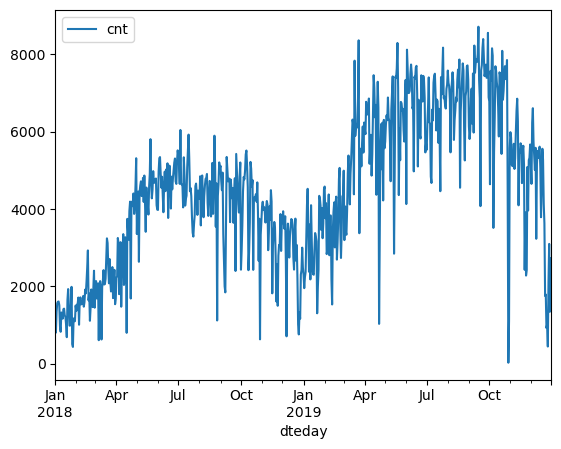

In [1426]:
# Date v/s cnt
bbike.plot.line(x='dteday',y='cnt')

<Axes: xlabel='yr', ylabel='cnt'>

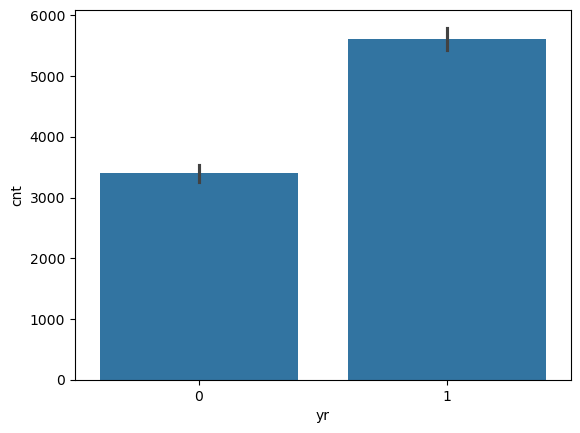

In [1427]:
# year v/s cnt
sns.barplot(data=bbike,x='yr',y='cnt')

#The bike rental count has increased from 2018 to 2019

<Axes: xlabel='month_name', ylabel='cnt'>

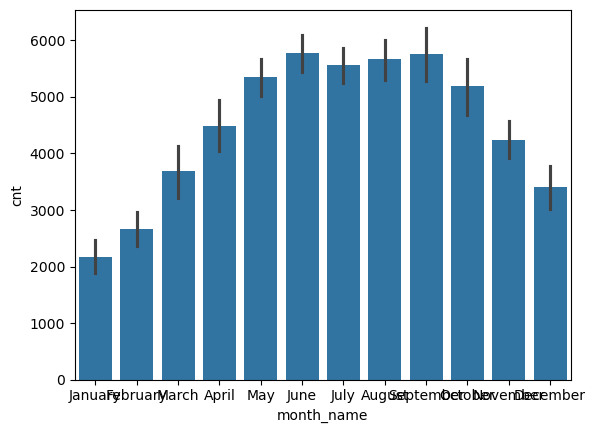

In [1428]:
# month_name v/s cnt
sns.barplot(data=bbike,x='month_name',y='cnt')

#The count of bike rentals is more from Apr till Nov

<Axes: xlabel='days_of_week', ylabel='cnt'>

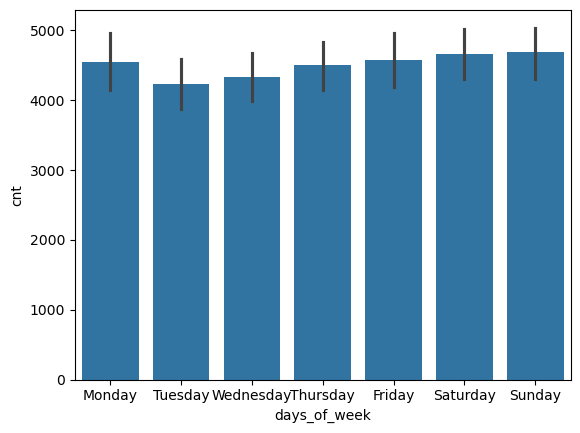

In [1429]:
# days_of_week v/s cnt
sns.barplot(data=bbike,x='days_of_week',y='cnt')

#This visualisation doesn't show a clear distribution picture of bike counts during days of the week. Though Friday till Monday the count of bike rentals is high

<Axes: xlabel='workingday', ylabel='cnt'>

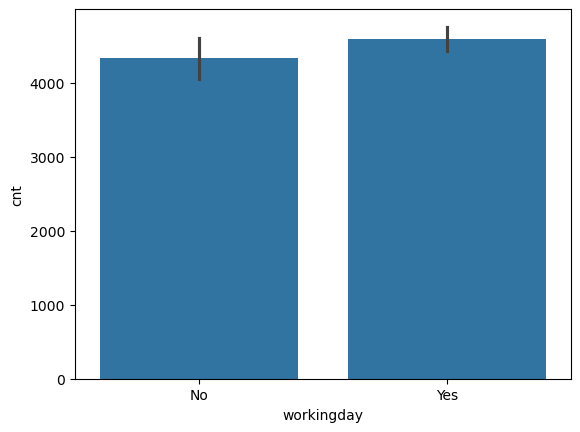

In [1430]:
# working day v/s cnt
sns.barplot(data=bbike,x='workingday',y='cnt')

#The bike rental count is more during working days comapred to weekends or holidays

<Axes: xlabel='seasons', ylabel='cnt'>

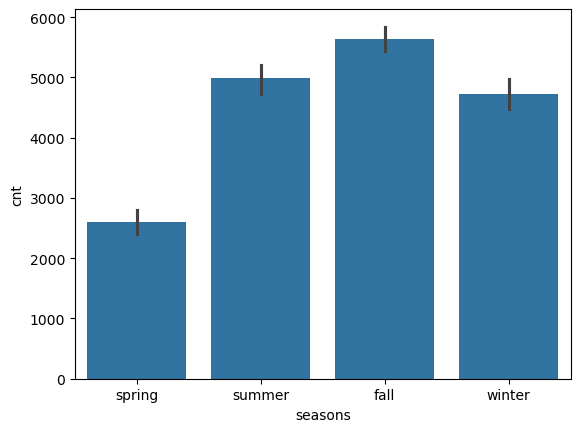

In [1431]:
# seasons v/s cnt
sns.barplot(data=bbike,x='seasons',y='cnt')

#Fall and summer accounts for highest bike rental count and spring shows least bike rental count

<Axes: xlabel='day_weather', ylabel='cnt'>

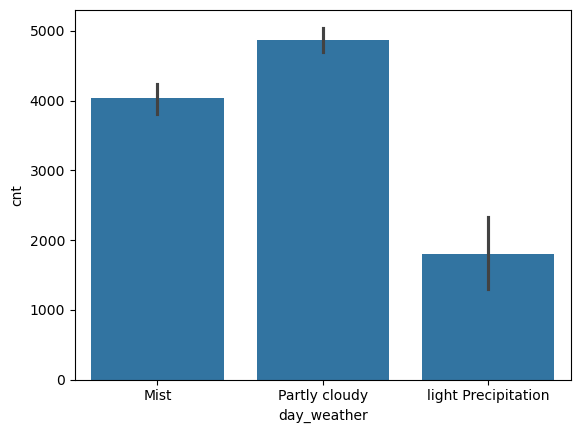

In [1432]:
# day_weather v/s cnt
sns.barplot(data=bbike,x='day_weather',y='cnt')

#rental count of bikes are significant when the weather is clear to mist and low during light precipitation and no rentals at all during heavy precipitation

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

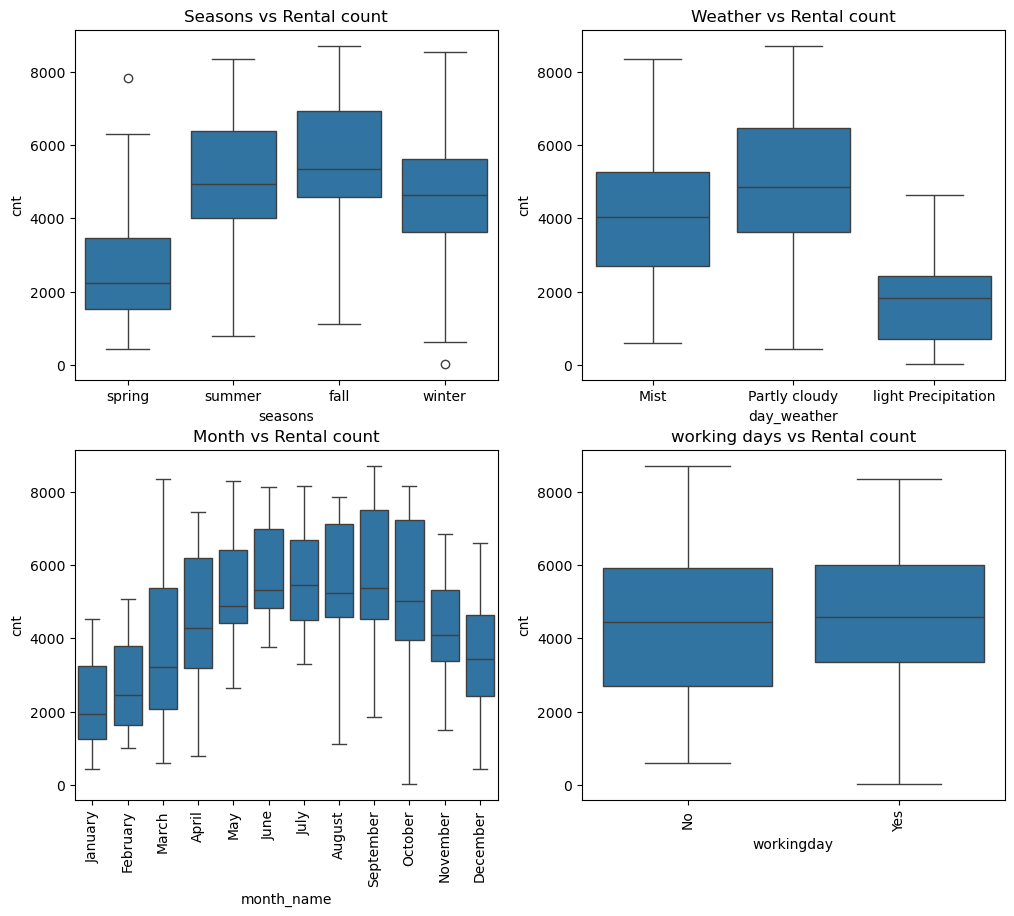

In [1433]:
# SIngle view of Categorical variables
plt.figure(figsize= (12,10))
plt.subplot(2,2,1)
sns.boxplot(y='cnt',x='seasons',data = bbike)
plt.title("Seasons vs Rental count")
plt.subplot(2,2,2)
sns.boxplot(y='cnt',x='day_weather',data = bbike)
plt.title("Weather vs Rental count")
plt.subplot(2,2,3)
sns.boxplot(y='cnt',x='month_name',data = bbike)
plt.title("Month vs Rental count")
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(y='cnt',x='workingday',data = bbike)
plt.title("working days vs Rental count")
plt.xticks(rotation=90)


In [1434]:
bbike.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'seasons', 'month_name', 'days_of_week',
       'day_weather'],
      dtype='object')

In [1435]:
bbike.describe()

,instant,dteday,yr,temp,atemp,hum,windspeed,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,0.500000,20.319259,23.726322,62.765175,12.763620,4508.006849
min,1.000000,2018-01-01 00:00:00,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2018-07-02 06:00:00,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,2018-12-31 12:00:00,0.500000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,2019-07-01 18:00:00,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,2019-12-31 00:00:00,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000
std,210.877136,NaN,0.500343,7.506729,8.150308,14.237589,5.195841,1936.011647


In [1473]:
season_month_summary = bbike.groupby(['seasons', 'month_name'])['cnt'].mean().reset_index()
print(season_month_summary)

   seasons month_name          cnt
0     fall     August  5664.419355
1     fall       July  5563.677419
2     fall       June  5769.400000
3     fall  September  5672.704545
4   spring   December  1954.454545
5   spring   February  2669.964286
6   spring    January  2176.338710
7   spring      March  3551.625000
8   summer      April  4484.900000
9   summer       June  5773.850000
10  summer      March  3947.954545
11  summer        May  5349.774194
12  winter   December  4200.950000
13  winter   November  4247.183333
14  winter    October  5199.225806
15  winter  September  6024.500000


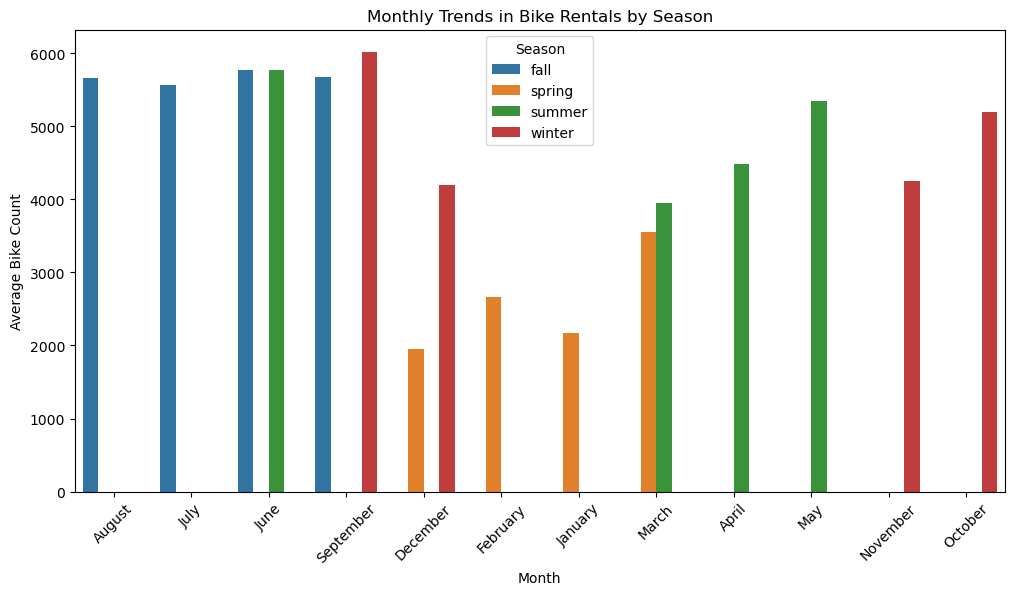

In [1479]:
plt.figure(figsize=(12, 6))
sns.barplot(data=season_month_summary, x='month_name', y='cnt', hue='seasons')
plt.title('Monthly Trends in Bike Rentals by Season')
plt.ylabel('Average Bike Count')
plt.xlabel('Month')
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.show()

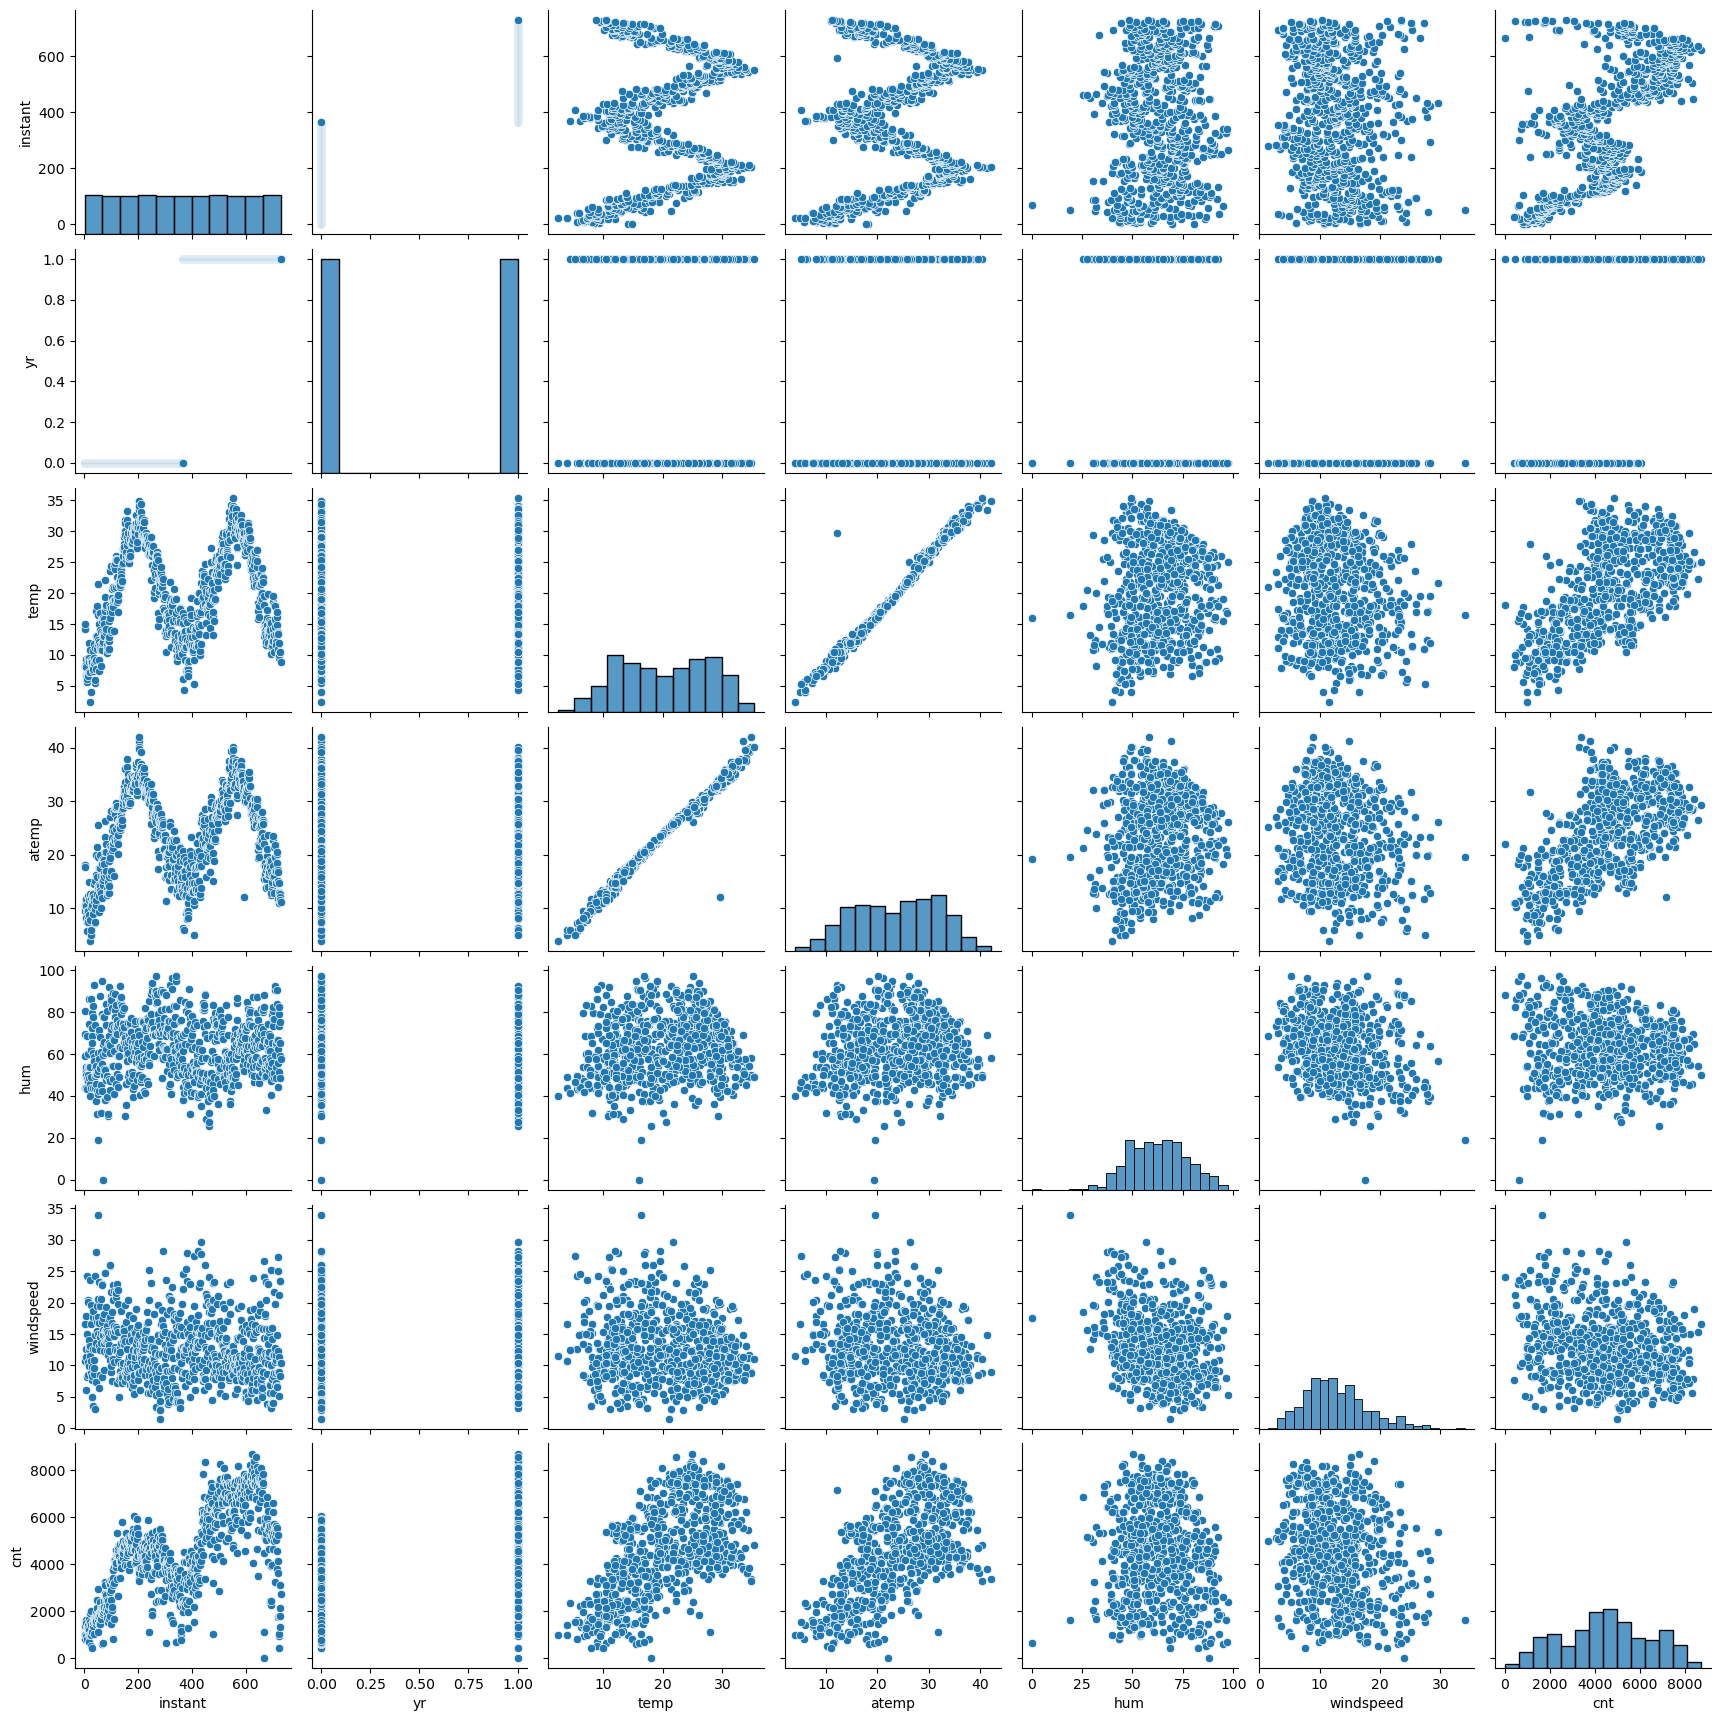

In [1304]:
#Visualising Numeric Variables
sns.pairplot(bbike)
plt.show()

# there is a linear relation of the bike rental count with temperature and feeling temperature

<Axes: >

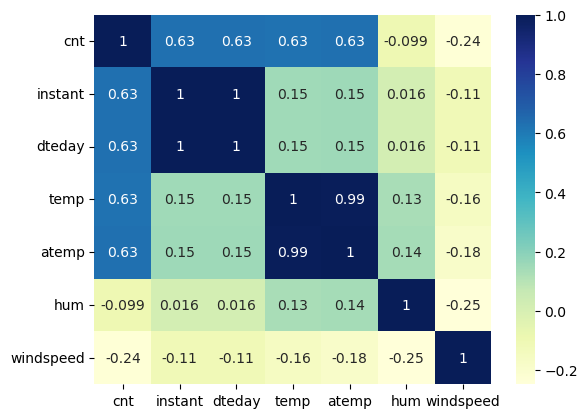

In [1305]:
# heat map on the numeric variables
corr_bbike=bbike[['cnt','instant','dteday','temp', 'atemp',
       'hum', 'windspeed']].corr()

sns.heatmap(corr_bbike,annot=True,cmap='YlGnBu')
# The heat map also shows positive correlation of temperature and feeling temperature with count of rental bikes. 
#So we can go ahead with the linear regression model to find the parameters/variables impacting the bike rentals/bike demand

# Step 2 : Preparing the data for Modelling

### Step 2a :Create Dummy variables (if required)

We have holiday,workingday,seasons,month name, days of the week and day weather  as catagorical variables.
These need to be encoded to numerical data from catagorical values so that ML model can use them

In [1308]:
bbike.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'seasons', 'month_name', 'days_of_week',
       'day_weather'],
      dtype='object')

In [1309]:
# List of categorical variables with Yes/No
var_list_bi = ['holiday','workingday']
# List of categorical variables with multiple categories 
var_list_multi = ['seasons', 'month_name', 'days_of_week','day_weather']
#bbike[var_list_bi].value_counts() #--- to check the values with in the columns
# Encoding yes/No variables into 0 and 1
bbike[var_list_bi] = bbike[var_list_bi].apply(lambda x:x.map({'Yes':1,'No':0}))

In [1310]:
bbike[var_list_bi].value_counts() # verify the data has been correctly translated

holiday  workingday
0        1             499
         0             210
1        0              21
Name: count, dtype: int64

In [1311]:
# creating dummy variables for seasons
season = pd.get_dummies(bbike['seasons'],dtype=int,drop_first = True)
month = pd.get_dummies(bbike['month_name'],dtype=int,drop_first = True)
daysofweek = pd.get_dummies(bbike['days_of_week'],dtype=int,drop_first = True)
weather = pd.get_dummies(bbike['day_weather'],dtype=int,drop_first = True)

In [1312]:
#concatenate the dummy variables in the original data set
bbike = pd.concat([bbike,season,month,daysofweek,weather],axis = 1)

In [1313]:
bbike.shape

(730, 36)

#### After concatenation we have 36 variables in total

In [1315]:
# dropping the original catagorical variables
bbike = bbike.drop(columns= var_list_multi )

In [1316]:
# dropping record index and date varibales as well. These would be tightly coupled to the count of bike rentals as these are unique variables for the data taken
bbike = bbike.drop(columns=['instant', 'dteday'])

In [1317]:
bbike.shape

(730, 30)

#### We are left with 30 varibales to work with

### Step 2b : Splitting the data set into Training and Test data sets

In [1320]:
import sklearn
from sklearn.model_selection import train_test_split

In [1321]:
#Spliting the data into train and test data sets in the ratio of 70:30
bbike_train,bbike_test = train_test_split(bbike,train_size = 0.7,random_state = 100)

In [1322]:
bbike_train.shape

(510, 30)

In [1323]:
bbike_test.shape

(220, 30)

### Step 2c :Rescaling the features

In this segment Min-Max scaling (normalisation) is used. We would be normalising only the numeric variables which are data not compressed between 0 and 1. So the steps here is to first identify the list of numeric variables under the condition. Then instantiate the scalar co-efficients and then normalise the variables with the co-efficients

In [1325]:
bbike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Partly cloudy', 'light Precipitation'],
      dtype='object')

In [1326]:
# Create list of numeric variables to be normalised
num_var =  ['temp', 'atemp','hum', 'windspeed', 'cnt']

In [1327]:
from sklearn.preprocessing import MinMaxScaler
#Initiate the Min-Max scalaer
scaler = MinMaxScaler()

In [1328]:
# Fit and transform the data
bbike_train[num_var] = scaler.fit_transform(bbike_train[num_var])
# Transform the test data
bbike_test[num_var] = scaler.transform(bbike_test[num_var])

In [1329]:
bbike_test.head()
bbike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Partly cloudy,light Precipitation
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.654545,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.476601,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1110]:
bbike_train.head()
bbike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Partly cloudy,light Precipitation
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.625490,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.484471,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3 : Training the Model
#### As the number of variables are >= 30 we can use recursive feature elimination (RFE) for a course feature selection. But here we shall use building the model by checking on the p-values and VIF which is time consuming for sure

In [1112]:
bbike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Partly cloudy', 'light Precipitation'],
      dtype='object')

In [1113]:

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


#### Build model with all variables

In [1115]:
# creating y_train and X_train
y_train = bbike_train.pop('cnt')
X_train = bbike_train

In [1116]:
# add a constant
X_train_sm = sm.add_constant(X_train)

In [1117]:
# Model with all the variables
lr_m1 = sm.OLS(y_train,X_train_sm).fit()
lr_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.81e-180
Time:                        16:49:05   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1933      0.038      5.126      0.000       0.119       0.267
yr                      0.2325      0.008     28.794      0.000       0.217       0.248
holiday                -0.0046      0.025     -0.185      0.853      -0.053       0.044
workingday              0.0808      0.012      6.511      0.000       0.056       0.105
temp                    0.3880      0.142      2.727      0.007       0.108       0.668
atemp                   0.0590      0.138      0.426      0.670      -0.213       0.331
hum                    -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed              -0.1836      0.026     -6.962      0.000      -0.235      -0.132
spring                 -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer                  0.0424      0.026      1.617      0.107      -0.009       0.094
winter                  0.1071      0.028      3.826      0.000       0.052       0.162
August                  0.0223      0.034      0.657      0.511      -0.044       0.089
December               -0.0443      0.034     -1.316      0.189      -0.110       0.022
February               -0.0323      0.033     -0.980      0.327      -0.097       0.032
January                -0.0631      0.034     -1.876      0.061      -0.129       0.003
July                   -0.0327      0.035     -0.931      0.352      -0.102       0.036
June                    0.0060      0.025      0.241      0.810      -0.043       0.055
March                   0.0016      0.025      0.063      0.950      -0.047       0.050
May                     0.0255      0.021      1.208      0.228      -0.016       0.067
November               -0.0398      0.036     -1.093      0.275      -0.111       0.032
October                 0.0077      0.036      0.215      0.830      -0.063       0.078
September               0.0868      0.032      2.711      0.007       0.024       0.150
Monday                  0.0856      0.014      6.202      0.000       0.059       0.113
Saturday               -0.0038      0.015     -0.261      0.794      -0.033       0.025
Sunday                  0.0059      0.015      0.394      0.694      -0.023       0.035
Thursday               -0.0125      0.015     -0.851      0.395      -0.042       0.016
Tuesday                 0.0314      0.014      2.216      0.027       0.004       0.059
Wednesday              -0.0157      0.015     -1.074      0.283      -0.044       0.013
Partly cloudy           0.0595      0.010      5.701      0.000       0.039       0.080
light Precipitation    -0.1955      0.025     -7.787      0.000      -0.245      -0.146
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):       

#### Calculating VIF

In [1119]:
# import Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [1120]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values(by = "VIF" , ascending = False)
vif_data

,Feature,VIF
2,workingday,97.406515
3,temp,66.896825
4,atemp,56.027582
21,Monday,22.083058
25,Tuesday,20.757254
7,spring,10.765395
9,winter,9.461499
8,summer,8.291722
18,November,6.788200
10,August,6.469361


### from the above modeling we find 'atemp' has high p-value and high VIF. We shall drop the column and see the impact on the model

In [1122]:
#dropping atemp column
X_train = X_train.drop(columns = ['atemp'])

In [1123]:
# add a constant
X_train_sm = sm.add_constant(X_train)

# Model building
lr_m2 = sm.OLS(y_train,X_train_sm).fit()
lr_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.00e-181
Time:                        16:49:06   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1933      0.038      5.129      0.000       0.119       0.267
yr                      0.2324      0.008     28.819      0.000       0.217       0.248
holiday                -0.0052      0.024     -0.211      0.833      -0.053       0.043
workingday              0.0810      0.012      6.530      0.000       0.057       0.105
temp                    0.4454      0.046      9.628      0.000       0.354       0.536
hum                    -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed              -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring                 -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer                  0.0430      0.026      1.645      0.101      -0.008       0.094
winter                  0.1076      0.028      3.853      0.000       0.053       0.163
August                  0.0204      0.034      0.607      0.544      -0.046       0.086
December               -0.0443      0.034     -1.317      0.189      -0.110       0.022
February               -0.0324      0.033     -0.985      0.325      -0.097       0.032
January                -0.0633      0.034     -1.885      0.060      -0.129       0.003
July                   -0.0338      0.035     -0.969      0.333      -0.102       0.035
June                    0.0046      0.025      0.186      0.853      -0.044       0.053
March                   0.0013      0.025      0.052      0.959      -0.047       0.050
May                     0.0247      0.021      1.173      0.241      -0.017       0.066
November               -0.0399      0.036     -1.096      0.274      -0.111       0.032
October                 0.0075      0.036      0.210      0.834      -0.063       0.078
September               0.0859      0.032      2.692      0.007       0.023       0.149
Monday                  0.0858      0.014      6.226      0.000       0.059       0.113
Saturday               -0.0036      0.015     -0.248      0.804      -0.032       0.025
Sunday                  0.0055      0.015      0.368      0.713      -0.024       0.035
Thursday               -0.0124      0.015     -0.844      0.399      -0.041       0.017
Tuesday                 0.0316      0.014      2.234      0.026       0.004       0.059
Wednesday              -0.0154      0.015     -1.057      0.291      -0.044       0.013
Partly cloudy           0.0596      0.010      5.709      0.000       0.039       0.080
light Precipitation    -0.1963      0.025     -7.850      0.000      -0.245      -0.147
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                         

In [1124]:
#Running the VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values(by = "VIF" , ascending = False)
vif_data

,Feature,VIF
2,workingday,97.404808
20,Monday,22.081724
24,Tuesday,20.756043
6,spring,10.747592
8,winter,9.441343
7,summer,8.265165
3,temp,7.084168
17,November,6.788097
18,October,6.466548
9,August,6.358198


### No significant Change in the Model. Let us drop spring and Summer which show p-value > 0.05 and high VIF

In [1126]:
#dropping 'spring','summer' column
X_train = X_train.drop(columns = ['spring','summer'])

In [1127]:
# add a constant
X_train_sm = sm.add_constant(X_train)

# Model building
lr_m3 = sm.OLS(y_train,X_train_sm).fit()
lr_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     108.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.92e-180
Time:                        16:49:06   Log-Likelihood:                 519.60
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     484   BIC:                            -877.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2275      0.031      7.329      0.000       0.166       0.288
yr                      0.2325      0.008     28.483      0.000       0.216       0.249
holiday                 0.0032      0.024      0.134      0.894      -0.044       0.051
workingday              0.0897      0.011      7.897      0.000       0.067       0.112
temp                    0.4380      0.046      9.479      0.000       0.347       0.529
hum                    -0.1427      0.039     -3.671      0.000      -0.219      -0.066
windspeed              -0.1884      0.026     -7.252      0.000      -0.239      -0.137
winter                  0.1322      0.023      5.842      0.000       0.088       0.177
August                 -0.0215      0.024     -0.905      0.366      -0.068       0.025
December               -0.1204      0.027     -4.515      0.000      -0.173      -0.068
February               -0.1218      0.023     -5.279      0.000      -0.167      -0.076
January                -0.1539      0.024     -6.487      0.000      -0.200      -0.107
July                   -0.0747      0.026     -2.837      0.005      -0.126      -0.023
June                   -0.0091      0.024     -0.379      0.705      -0.056       0.038
March                  -0.0559      0.019     -2.867      0.004      -0.094      -0.018
May                     0.0243      0.021      1.141      0.254      -0.018       0.066
November               -0.1091      0.031     -3.570      0.000      -0.169      -0.049
October                -0.0615      0.030     -2.035      0.042      -0.121      -0.002
September               0.0372      0.023      1.634      0.103      -0.008       0.082
Monday                  0.0950      0.013      7.448      0.000       0.070       0.120
Saturday               -0.0029      0.015     -0.199      0.843      -0.032       0.026
Sunday                  0.0051      0.015      0.341      0.734      -0.025       0.035
Thursday               -0.0118      0.015     -0.791      0.430      -0.041       0.018
Tuesday                 0.0396      0.013      2.967      0.003       0.013       0.066
Wednesday              -0.0142      0.015     -0.959      0.338      -0.043       0.015
Partly cloudy           0.0585      0.011      5.544      0.000       0.038       0.079
light Precipitation    -0.1957      0.025     -7.744      0.000      -0.245      -0.146
==============================================================================
Omnibus:                       75.760   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.059
Skew:                          -0.722   Prob(JB):                     1.48e-46
Kurtosis:                       5.801   Cond. No.                     2.24e+16
================================================

In [1128]:
#Running the VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values(by = "VIF" , ascending = False)
vif_data

,Feature,VIF
2,workingday,64.846405
18,Monday,14.445811
22,Tuesday,13.947156
3,temp,6.894596
6,winter,6.043102
15,November,4.668588
16,October,4.475218
1,holiday,3.736080
8,December,3.481162
7,August,3.122464


### There is slight decrease in the R-sqed value (0.853 to 0.848). Let us now remove high p-value columns and low VIF : Holiday, August, June, Saturday and Sunday

In [1130]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'winter',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Partly cloudy',
       'light Precipitation'],
      dtype='object')

In [1131]:
#dropping 'holiday','August','June','Saturday', 'Sunday' column
X_train = X_train.drop(columns = ['holiday','August','June','Saturday', 'Sunday'])

In [1132]:
# add a constant
X_train_sm = sm.add_constant(X_train)

# Model building
lr_m4 = sm.OLS(y_train,X_train_sm).fit()
lr_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.40e-184
Time:                        16:49:06   Log-Likelihood:                 518.98
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     488   BIC:                            -900.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2345      0.047      5.017      0.000       0.143       0.326
yr                      0.2330      0.008     28.800      0.000       0.217       0.249
workingday              0.0854      0.027      3.185      0.002       0.033       0.138
temp                    0.4168      0.037     11.232      0.000       0.344       0.490
hum                    -0.1422      0.038     -3.696      0.000      -0.218      -0.067
windspeed              -0.1852      0.026     -7.237      0.000      -0.236      -0.135
winter                  0.1327      0.023      5.881      0.000       0.088       0.177
December               -0.1173      0.026     -4.500      0.000      -0.169      -0.066
February               -0.1195      0.023     -5.262      0.000      -0.164      -0.075
January                -0.1531      0.024     -6.499      0.000      -0.199      -0.107
July                   -0.0598      0.017     -3.425      0.001      -0.094      -0.025
March                  -0.0512      0.018     -2.839      0.005      -0.087      -0.016
May                     0.0344      0.016      2.119      0.035       0.003       0.066
November               -0.1055      0.030     -3.546      0.000      -0.164      -0.047
October                -0.0544      0.028     -1.911      0.057      -0.110       0.002
September               0.0480      0.017      2.802      0.005       0.014       0.082
Monday                  0.0897      0.029      3.092      0.002       0.033       0.147
Thursday               -0.0124      0.013     -0.981      0.327      -0.037       0.012
Tuesday                 0.0348      0.029      1.196      0.232      -0.022       0.092
Wednesday              -0.0147      0.012     -1.191      0.234      -0.039       0.010
Partly cloudy           0.0587      0.010      5.607      0.000       0.038       0.079
light Precipitation    -0.1967      0.025     -7.851      0.000      -0.246      -0.147
==============================================================================
Omnibus:                       76.396   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.825
Skew:                          -0.713   Prob(JB):                     4.11e-49
Kurtosis:                       5.907   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1133]:
#Running the VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values(by = "VIF" , ascending = False)
vif_data

,Feature,VIF
3,hum,31.588062
2,temp,24.727352
1,workingday,20.029674
5,winter,8.011399
15,Monday,5.512868
17,Tuesday,5.333425
4,windspeed,4.686555
12,November,4.531535
13,October,4.271228
19,Partly cloudy,3.734126


### OBSERVATION : 
1. No chnage in R squared value. However the VIF now has changed where humidity has taken precedence over working-day
2. The message from the model that there is strong multicollinearity problems has dissappeareds

### ACTION : 
- Let us remove all the high p-valued features and track the change in the model
- Features to be removed now : October, Thursday, Tuesday and Wednesday

In [1136]:
X_train.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'winter', 'December',
       'February', 'January', 'July', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Thursday', 'Tuesday', 'Wednesday',
       'Partly cloudy', 'light Precipitation'],
      dtype='object')

In [1137]:
#dropping 'October','Thursday', 'Tuesday', 'Wednesday' column
X_train = X_train.drop(columns = ['October','Thursday', 'Tuesday', 'Wednesday'])

In [1138]:
# add a constant
X_train_sm = sm.add_constant(X_train)

# Model building
lr_m5 = sm.OLS(y_train,X_train_sm).fit()
lr_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     157.9
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.14e-186
Time:                        16:49:06   Log-Likelihood:                 514.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     492   BIC:                            -916.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2561      0.039      6.612      0.000       0.180       0.332
yr                      0.2331      0.008     28.747      0.000       0.217       0.249
workingday              0.0531      0.011      4.838      0.000       0.032       0.075
temp                    0.4330      0.036     11.929      0.000       0.362       0.504
hum                    -0.1533      0.038     -4.004      0.000      -0.229      -0.078
windspeed              -0.1893      0.026     -7.375      0.000      -0.240      -0.139
winter                  0.0987      0.014      7.026      0.000       0.071       0.126
December               -0.0832      0.019     -4.358      0.000      -0.121      -0.046
February               -0.1105      0.022     -5.014      0.000      -0.154      -0.067
January                -0.1424      0.023     -6.246      0.000      -0.187      -0.098
July                   -0.0579      0.017     -3.311      0.001      -0.092      -0.024
March                  -0.0420      0.018     -2.394      0.017      -0.077      -0.008
May                     0.0406      0.016      2.533      0.012       0.009       0.072
November               -0.0647      0.019     -3.398      0.001      -0.102      -0.027
September               0.0593      0.016      3.739      0.000       0.028       0.090
Monday                  0.0627      0.014      4.432      0.000       0.035       0.091
Partly cloudy           0.0567      0.010      5.409      0.000       0.036       0.077
light Precipitation    -0.1977      0.025     -7.878      0.000      -0.247      -0.148
==============================================================================
Omnibus:                       86.240   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.144
Skew:                          -0.780   Prob(JB):                     1.32e-59
Kurtosis:                       6.213   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1139]:
#Running the VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values(by = "VIF" , ascending = False)
vif_data

,Feature,VIF
3,hum,23.541142
2,temp,22.630396
1,workingday,4.796285
4,windspeed,4.254159
15,Partly cloudy,3.359838
5,winter,2.986240
8,January,2.310232
0,yr,2.085705
12,November,1.891289
14,Monday,1.857496


### OBSERVATION : 
1. Slight decrease in R-squared(0.848 to 0.845). However the VIF for humidity has reduced drastically.
2. None of the p-values of the remaining feature are greater than 0.05
3. VIF for working day and winter has come down below 5

### ACTION : 
- Let us now remove the high VIF features and check the impact
- Features to be removed now : 'hum' i.e humidity which has a VIF of 23.5

In [1142]:
#dropping 'hum' column
X_train = X_train.drop(columns = ['hum'])

In [1143]:
# add a constant
X_train_sm = sm.add_constant(X_train)

# Model building
lr_m6 = sm.OLS(y_train,X_train_sm).fit()
lr_m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.8
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.24e-184
Time:                        16:49:07   Log-Likelihood:                 506.27
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     493   BIC:                            -906.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1547      0.030      5.200      0.000       0.096       0.213
yr                      0.2367      0.008     28.926      0.000       0.221       0.253
workingday              0.0561      0.011      5.048      0.000       0.034       0.078
temp                    0.3970      0.036     11.121      0.000       0.327       0.467
windspeed              -0.1630      0.025     -6.472      0.000      -0.213      -0.114
winter                  0.0878      0.014      6.276      0.000       0.060       0.115
December               -0.0921      0.019     -4.786      0.000      -0.130      -0.054
February               -0.1174      0.022     -5.264      0.000      -0.161      -0.074
January                -0.1543      0.023     -6.720      0.000      -0.199      -0.109
July                   -0.0520      0.018     -2.938      0.003      -0.087      -0.017
March                  -0.0471      0.018     -2.652      0.008      -0.082      -0.012
May                     0.0300      0.016      1.866      0.063      -0.002       0.062
November               -0.0654      0.019     -3.384      0.001      -0.103      -0.027
September               0.0537      0.016      3.351      0.001       0.022       0.085
Monday                  0.0672      0.014      4.693      0.000       0.039       0.095
Partly cloudy           0.0808      0.009      9.268      0.000       0.064       0.098
light Precipitation    -0.2167      0.025     -8.662      0.000      -0.266      -0.168
==============================================================================
Omnibus:                       88.960   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.377
Skew:                          -0.806   Prob(JB):                     2.16e-61
Kurtosis:                       6.248   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1144]:
#Running the VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values(by = "VIF" , ascending = False)
vif_data

,Feature,VIF
2,temp,8.221990
1,workingday,4.704482
3,windspeed,4.225867
14,Partly cloudy,2.839364
4,winter,2.479537
0,yr,2.079769
13,Monday,1.840662
11,November,1.819786
5,December,1.486322
8,July,1.432432


### OBSERVATION : 
1. There is slight decrease in R-squared from 0.845 to 0.840.
2. None of the p-values of the remaining feature are greater than 0.05
3. VIF for working day and winter has come down below 5

### ACTION : 
- Let us now remove the only high VIF features and check the impact
- Features to be removed now : 'temp' i.e temperature which has a VIF of 8.22

In [1147]:
#dropping 'temp' column
X_train = X_train.drop(columns = ['temp'])

In [1148]:
# add a constant
X_train_sm = sm.add_constant(X_train)

# Model building
lr_m7 = sm.OLS(y_train,X_train_sm).fit()
lr_m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     131.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.25e-161
Time:                        16:49:07   Log-Likelihood:                 449.20
No. Observations:                 510   AIC:                            -866.4
Df Residuals:                     494   BIC:                            -798.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4295      0.018     23.221      0.000       0.393       0.466
yr                      0.2474      0.009     27.258      0.000       0.230       0.265
workingday              0.0614      0.012      4.953      0.000       0.037       0.086
windspeed              -0.2130      0.028     -7.688      0.000      -0.267      -0.159
winter                  0.0406      0.015      2.725      0.007       0.011       0.070
December               -0.1988      0.019    -10.662      0.000      -0.235      -0.162
February               -0.2703      0.020    -13.767      0.000      -0.309      -0.232
January                -0.3405      0.018    -19.413      0.000      -0.375      -0.306
July                    0.0145      0.019      0.781      0.435      -0.022       0.051
March                  -0.1507      0.017     -8.913      0.000      -0.184      -0.117
May                     0.0169      0.018      0.944      0.346      -0.018       0.052
November               -0.1323      0.021     -6.448      0.000      -0.173      -0.092
September               0.0656      0.018      3.671      0.000       0.030       0.101
Monday                  0.0683      0.016      4.267      0.000       0.037       0.100
Partly cloudy           0.0870      0.010      8.940      0.000       0.068       0.106
light Precipitation    -0.2251      0.028     -8.057      0.000      -0.280      -0.170
==============================================================================
Omnibus:                       88.351   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.781
Skew:                          -0.802   Prob(JB):                     1.30e-60
Kurtosis:                       6.226   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1149]:
#Running the VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values(by = "VIF" , ascending = False)
vif_data

,Feature,VIF
2,windspeed,3.746356
1,workingday,3.414944
3,winter,2.469704
13,Partly cloudy,2.464454
0,yr,1.914987
10,November,1.780392
12,Monday,1.586608
4,December,1.418099
8,March,1.329665
6,January,1.226893


### OBSERVATION : 
1. There is drastic change in R-squared from 0.838 to 0.8 and adjusted R squared is 0.794. Was it is good move to drop the temperature from the model? I am indecisive of trading off the temperature feature, reason being there was a visible positive linear correlation of this feature with rental count when I was inspecting and visualising the data.
2. None of the p-values of the remaining feature are greater than 0.05, which is a good sign
3. VIF for all the remaining 15 columns are below 5 which shows we have handled multicollinearity very well
4. From 30 features we end up with 15 columns with a model performance of 0.8 after 7 iterations

### MY THOUGHTS :
1. I would trade off the temparature feature for now for this assignment. 
2. But I am also curious to check on the RFE method to see what would be the outcome.
3. Let me also check on the prediction

# Step 4 : Residual Analysis

In [1017]:
# We are taking the 7th iterated model 'lr_m7'
y_train_pred = lr_m7.predict(X_train_sm)

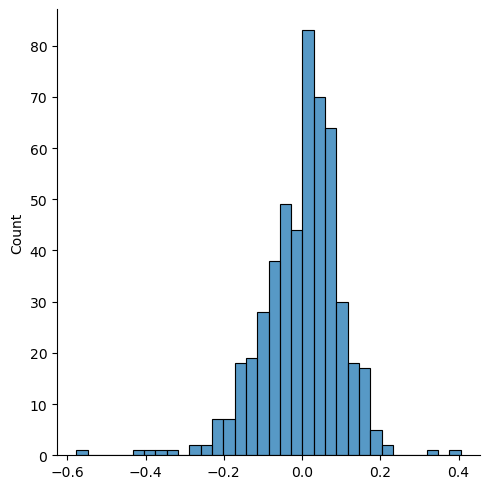

In [1019]:
#calculate residual 
res = y_train - y_train_pred
sns.displot(res)
plt.show()

#OBSERVATION : We have a normalised plot centred at zero

# Step 5: Evaluation and Prediction on test data

In [1238]:
# creating y_test and X_test
y_test = bbike_test.pop('cnt')
X_test = bbike_test

In [1240]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [1025]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Partly cloudy,light Precipitation
184,0,1,0,29.793347,33.27085,63.7917,5.459106,0,0,0,...,0,0,0,0,0,0,0,1,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,0,1,0,...,0,0,0,0,0,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,0,0,1,...,1,0,0,1,0,0,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [1027]:
X_train.columns

Index(['yr', 'workingday', 'windspeed', 'winter', 'December', 'February',
       'January', 'July', 'March', 'May', 'November', 'September', 'Monday',
       'Partly cloudy', 'light Precipitation'],
      dtype='object')

In [860]:
bbike_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Partly cloudy', 'light Precipitation'],
      dtype='object')

In [1242]:
#add constant to the X_test
X_test_sm = sm.add_constant(X_test)

# drop the variables which we have eliminated from the training set
X_test_sm = X_test_sm.drop(columns=['holiday','temp', 'atemp', 'hum','spring', 'summer','August','June', 'October','Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'])
X_test_sm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'winter', 'December',
       'February', 'January', 'July', 'March', 'May', 'November', 'September',
       'Monday', 'Partly cloudy', 'light Precipitation'],
      dtype='object')

In [1244]:
#Predict
y_test_pred = lr_m7.predict(X_test_sm)
y_test_pred

184    0.426073
535    0.792522
299    0.460285
221    0.505535
152    0.463403
         ...   
702    0.606671
127    0.518529
640    0.767768
72     0.383838
653    0.801770
Length: 220, dtype: float64

In [1246]:
#import libraries for r2 score
from sklearn.metrics import r2_score

In [1248]:
r2_score(y_test,y_test_pred)

0.7639210675232442

# OBSERVATION : 
### There is decrease in the R squared of predication (0.764) compared to the trained model R squared (0.80) 
### shows that the model is slightly less accurate when generalising the unseen data

# ---------------------------------END OF ASSIGNMENT ---------------------------------